<a href="https://colab.research.google.com/github/JorgeQuijano-dev/03MIAR-Algoritmos-de-Optimizacion/blob/main/03MIAR_trabajo_practico_AO_JQD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico Algoritmos de Optimización


## Problema 1  Organizar sesiones de doblaje
Nombre y Apellidos: Jorge Quijano Díaz  <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema: Problema 1  Organizar sesiones de doblaje
>1. Sesiones de doblaje <br>


Descripción del problema:

Se precisa coordinar el doblaje de una película.

- Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas.

- Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben.

- No es posible grabar más de 6 tomas por día.

- Una vez se graba una toma no se vuelve a grabar

- Cada toma puede grabarse en como máximo 1 día

El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible.

Los datos son:
Número de actores: 10
Número de tomas : 30
Actores/Tomas : Tabla https://bit.ly/36D8IuK                                       

In [1]:
import random
import math
import numpy as np
# from itertools import combinations
from copy import deepcopy
import matplotlib.pyplot as plt

### ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>

Respuesta:

Cuando hablamos de posibilidades en este contexto, nos referimos a las diferentes combinaciones o formas en que podemos organizar las tomas en días de trabajo.
Si considerando todas las posibles combinaciones de asignación de tomas a los días, desde grabar todo en el mismo día hasta grabar en 30 días distintos, entonces estamos buscando el número de permutaciones de 30 elementos (tomas) en un conjunto de 30 elementos (días).
La fórmula para calcular las permutaciones es n!, donde n es el número de elementos. En este caso, sería 30!.

In [2]:
# Calcular el factorial de 30
permutaciones = math.factorial(30)
print(permutaciones)

265252859812191058636308480000000


### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?

Lo que se busca es saber cuántas posibilidades diferentes hay de seleccionar 6 tomas de un grupo de 30, si el orden no importa y no se puede seleccionar la misma toma dos veces, hasta que todas las tomas han sido seleccionadas.

Esto se puede calcular usando la fórmula de las combinaciones sin repetición.

La fórmula para calcular el número de combinaciones es:

$$\begin{aligned}
\binom{n}{k} = \frac{n!}{k! \cdot (n-k)!}
\end{aligned}$$


Donde:

n es el número total de objetos, en este caso 30 tomas y k es el número de objetos que seleccionamos a la vez, en este caso 6 tomas como máximo al día,


Entonces, la primera selección sería $\binom{30}{6}$.

$$\begin{aligned}
\binom{30}{6} = \frac{30!}{6! \cdot (30-6)!} = \frac{30!}{6! \cdot 24!} = 593775
\end{aligned}$$

Luego, en la siguiente selección, quedarían 24 objetos y seleccionaríamos 6 más.

Eso sería $\binom{24}{6}$

$$\begin{aligned}
\binom{24}{6} = \frac{24!}{6! \cdot (24-6)!} = \frac{24!}{6! \cdot 18!} = 134596
\end{aligned}$$

En la siguiente selección, quedarían 18 objetos y seleccionaríamos 6 más.

Eso sería $\binom{18}{6}$

$$\begin{aligned}
\binom{18}{6} = \frac{18!}{6! \cdot (18-6)!} = \frac{18!}{6! \cdot 12!} = 18564
\end{aligned}$$

En la siguiente selección, quedarían 12 objetos y seleccionaríamos 6 más.

Eso sería $\binom{12}{6}$

$$\begin{aligned}
\binom{12}{6} = \frac{12!}{6! \cdot (12-6)!} = \frac{12!}{6! \cdot 6!} = 924
\end{aligned}$$

En la siguiente selección, quedarían 6 objetos y seleccionaríamos 6 más.

Eso sería $\binom{6}{6}$

$$\begin{aligned}
\binom{6}{6} = \frac{6!}{6! \cdot (6-6)!} = \frac{6!}{6! \cdot 0!} = 1
\end{aligned}$$

Donde al multiplicar todas esas combinaciones se obtiene el total de combinaciones posibles para seleccionar todos los objetos en grupos de 6.


Código extra: Cálculo posibilidades

A modo de representación y con la intención de poder calcular el número de combinaciones posibles ante cualquier valor de n o k se ha creado la función total_combinaciones().

In [3]:
# Función factorial.
def factorial(n):
    if n == 0 or n == 1: # Casos base: factorial de 0 y 1 es 1.
        return 1
    else:
        return n * factorial(n - 1) # Caso general: n * factorial(n - 1).

# Función de combinaciones.
def combinaciones(n, k):
    # La fórmula de las combinaciones es n! / [k!(n-k)!].
    return factorial(n) // (factorial(k) * factorial(n - k))

# Función que calcula el total de combinaciones.
def total_combinaciones(n, k):
    total = 1 # Inicializa total en 1.
    combinaciones_por_dia = [] # Lista para almacenar combinaciones de cada día.
    n_valores = list(range(n, 0, -k)) # Lista de los valores de n para cada dia.

    # Bucle que va desde 30 hasta 1, reduciendo 6 en cada iteración.
    for i in n_valores:
        combinacion_dia = combinaciones(i, k) # Calcula combinaciones para esta dia.
        combinaciones_por_dia.append(combinacion_dia) # Añadimos a la lista.
        total *= combinacion_dia # Actualiza total.

    # Imprimir las combinaciones de cada dia.
    for i, (n, combinacion) in enumerate(zip(n_valores, combinaciones_por_dia), 1):
        print(f"Combinaciones del día {i} ({n} {k})= {combinacion}")

    # Imprimir el total.
    print("Total= " + " * ".join(str(combi) for combi in combinaciones_por_dia) + f" = {total}")

n=30
k=6
total_combinaciones(n,k)

Combinaciones del día 1 (30 6)= 593775
Combinaciones del día 2 (24 6)= 134596
Combinaciones del día 3 (18 6)= 18564
Combinaciones del día 4 (12 6)= 924
Combinaciones del día 5 (6 6)= 1
Total= 593775 * 134596 * 18564 * 924 * 1 = 1370874167589326400


### Modelo para el espacio de soluciones<br>
¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Se puede utilizar una matriz para representar las tomas y los actores involucrados en cada una. Cada fila de la matriz representaría una toma, mientras que cada columna representaría a un actor.

La matriz se puede implementar como una lista de listas en Python.

Cada elemento de la matriz contendría el valor 1 si el actor participa en la toma correspondiente, o el valor 0 en caso contrario.

El valor en la posición (i, j) de la matriz indica si el actor j participa en la toma i.

Se ha escogido una matriz ya que los datos proporcionados tienen una estructura tabular y permite una representación directa y concisa de estos datos.

Con una matriz, es posible acceder rápidamente a los elementos individuales mediante el uso de índices.



In [4]:
tabla_actores = [
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
]

### Según el modelo para el espacio de soluciones<br>

#### ¿Cual es la función objetivo?

Si asumimos que el costo por día de cada actor de doblaje es el mismo $(C)$, entonces podemos representala función objetivo de la siguiente manera:

Sea D el número de días de grabación y $\ A_i $ el número de actores de doblaje necesarios en el día $\ i $.

La función objetivo sería:

$$\begin{aligned}
\ G = C \cdot (A_1 + A_2 + \ldots + A_D)
\end{aligned}$$


Donde $\ A_1, A_2, \ldots, A_D $ representan la cantidad de actores de doblaje necesarios en cada día de grabación, y $C$ es el costo por día de cada actor.


$$\begin{aligned}
\ G = C \cdot \sum_{i=1}^{D} A_i
\end{aligned}$$


En esta expresión, estamos sumando el número de actores de doblaje necesarios en cada día de grabación, y luego multiplicamos el resultado por el costo por día de cada actor $(C)$ para obtener el gasto total $(G)$.

En adelante no se tendrá en cuenta el costo por día del actor (C) en cuanto al problema de optimización ya que se tendrá en cuenta que todos cobran lo mismo y se indicará el número de actores que intervienen cada día.  




#### ¿Es un problema de maximización o minimización?


Este es un problema de minimización.

Se trata de minimizar la cantidad total de días que los actores necesitan para desplazarse al estudio de grabación para doblar todas las tomas de la película.

Para lograr esto, se necesita organizar las tomas de tal manera que se maximice la cantidad de tomas que cada actor puede doblar en cada uno de sus días de trabajo, sin superar el límite de 6 tomas por día.
En definitiva, se está tratando de minimizar la cantidad total de días de trabajo.


### Diseña un algoritmo para resolver el problema por fuerza bruta


#### Planteamiento Fuerza Bruta
El enfoque de fuerza bruta puede ser bastante costoso en términos de tiempo de cómputo, las restoricciones del problema ayudan a reducir el número de combinaciones que necesitan ser consideradas. Sin embargo,  para un problema de la escala proporcionada, el enfoque de fuerza bruta todavía puede llevar un tiempo extremadamente largo para ejecutarse.

Un enfoque de búsqueda exhaustiva o fuerza bruta se puede hacer generando cada una de las combinaciones posibles de tomas que se pueden filmar en un día y luego calculando la cantidad de actores usados en cada una de las ellas.

Para cada conjunto de tomas posible, se verifica si el total acumulado de actores usados es menor que el mínimo encontrado hasta el momento, y si es así, se actualiza el mínimo y guarda esta combinación de tomas como la mejor encontrada hasta el momento.

Este enfoque garantiza encontrar la solución óptima porque evalúa todas las combinaciones posibles, por lo que eventualmente encontrará la combinación que utiliza la menor cantidad de actores. Sin embargo, no es eficiente, ya que el número de combinaciones a evaluar es enorme y crece exponencialmente con el número de tomas.

Se ha valorado usar el módulo intertools de la biblioteca estándar de Python ya que proporciona diversas funciones para crear y manipular iteradores eficientemente. Un ejemplo es "combinations", una de las funciones más comunes del módulo itertools que genera todas las combinaciones posibles de elementos de una secuencia.
Se ha descartado la opción ya que mediante una función como obtener_combinaciones se representa mejor el coste computacional del problema.

In [5]:
# Función calcular_actores toma una lista de tomas y una tabla de actores
# y devuelve el número de actores únicos presentes en esas tomas.
def calcular_actores(tomas, tabla_actores):
    actores = set()  # Utiliza un conjunto para almacenar los actores únicos
    for toma in tomas:
        for i, actor in enumerate(tabla_actores[toma]):
            if actor == 1:
                actores.add(i)  # Agrega el índice del actor al conjunto
    return len(actores)  # Se devuelve la cantidad de actores únicos

mejor_total = float('inf')  # Variable global para rastrear el mejor total de actores
mejor_tomas = None  # Variable global para rastrear las mejores tomas seleccionadas

# Función obtener_combinaciones devuelve todas las combinaciones posibles
# de k elementos de una lista de tomas utilizando recursión.
def obtener_combinaciones(tomas, k):
    if k == 0:
        return [[]]  # Caso base: lista vacía
    if len(tomas) == 0:
        return []  # Caso base: no hay más tomas
    result = []  # Lista para almacenar las combinaciones
    primera = tomas[0]  # Primera toma de la lista
    resto = tomas[1:]  # Resto de las tomas
    # Recursivamente obtenemos las combinaciones con k-1 elementos
    # y las concatenamos con la primera toma.
    for comb in obtener_combinaciones(resto, k - 1):
        result.append([primera] + comb)
    # Recursivamente obtenemos las combinaciones sin incluir la primera toma.
    result.extend(obtener_combinaciones(resto, k))
    return result

# La función procesar_tomas realiza el procesamiento principal para encontrar
# las mejores combinaciones de tomas que contengan la menor cantidad de actores.
def procesar_tomas(tomas_restantes, tomas_seleccionadas, total_actores, tabla_actores):
    global mejor_total  # Accedemos a la variable global mejor_total
    global mejor_tomas  # Accedemos a la variable global mejor_tomas

    if not tomas_restantes:  # Si no hay más tomas restantes
        if total_actores < mejor_total:
            # Si el total de actores es menor que el mejor total actual,
            # actualizamos las variables mejor_total y mejor_tomas.
            mejor_total = total_actores
            mejor_tomas = tomas_seleccionadas
            # Imprimimos la mejor combinación de tomas encontrada hasta ahora.
            print("El menor número de desplazamientos al estudio de actores hasta ahora:", mejor_total)
            print("Tomas seleccionadas:", [[toma + 1 for toma in tomas] for tomas in mejor_tomas])
        return

    # Obtenemos todas las combinaciones posibles de 6 tomas restantes.
    combinaciones_tomas = obtener_combinaciones(tomas_restantes, 6)

    # Itera sobre las combinaciones de tomas.
    for tomas in combinaciones_tomas:
        # Calcula la cantidad de actores en la combinación actual.
        actores = calcular_actores(tomas, tabla_actores)
        # Actualiza las variables para la próxima llamada recursiva.
        nuevas_tomas_seleccionadas = tomas_seleccionadas + [tomas]
        nuevos_total_actores = total_actores + actores

        # Genera la lista de tomas restantes sin las tomas seleccionadas.
        nuevas_tomas_restantes = [toma for toma in tomas_restantes if toma not in tomas]

        # Realiza una llamada recursiva con las nuevas tomas seleccionadas y restantes.
        procesar_tomas(nuevas_tomas_restantes, nuevas_tomas_seleccionadas, nuevos_total_actores, tabla_actores)



In [6]:
try:
    procesar_tomas(list(range(30)), [], 0, tabla_actores)
except KeyboardInterrupt:
    print("Búsqueda interrumpida.")

El menor número de desplazamientos al estudio de actores hasta ahora: 39
Tomas seleccionadas: [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 24], [25, 26, 27, 28, 29, 30]]
El menor número de desplazamientos al estudio de actores hasta ahora: 38
Tomas seleccionadas: [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 25], [24, 26, 27, 28, 29, 30]]
El menor número de desplazamientos al estudio de actores hasta ahora: 37
Tomas seleccionadas: [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18], [19, 20, 21, 23, 24, 29], [22, 25, 26, 27, 28, 30]]
El menor número de desplazamientos al estudio de actores hasta ahora: 36
Tomas seleccionadas: [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18], [19, 21, 23, 24, 26, 29], [20, 22, 25, 27, 28, 30]]
El menor número de desplazamientos al estudio de actores hasta ahora: 35
Tomas seleccionadas: [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12]

### Calcula la complejidad del algoritmo por fuerza bruta

Respuesta


El costo total se calcula sumando los costos de calcular las combinaciones de tomas y los costos de calcular la cantidad de actores en cada combinación, además de las comparaciones y asignaciones adicionales en cada combinación.



El costo que surge de sumar los actores en cada combinación de tomas seleccionada y la comparación y asignación para verificar si el total de actores es menor que el mejor total registrado tienen una complejidad constante, ya que solo se realiza una vez en cada nivel de recursión.

Por lo tanto, en la práctica, podríamos simplificarlo a:
$$\begin{aligned}
O(\binom{30}{6} \cdot \binom{24}{6} \cdot \binom{18}{6} \cdot \binom{12}{6} \cdot \binom{6}{6}* C)
\end{aligned}$$


Al calcular la complejidad del algoritmo generalmente queremos simplificarlo y que se pueda entender en cualquier tamaño de datos.

Por lo que para facilitar el entendimiento de la complejidad se va a sustituir el número de tomas por $T$ y el máximo de tomas al día por $M$.

Cuando $T$ tiende a infinito, se pueden eliminar los términos más pequeños y las constantes. Por lo tanto, podríamos simplificarlo a:

$$\begin{aligned}
O\left(\prod_{i=0}^{\lfloor T/M \rfloor}\binom{T-iM}{M} \right)
\end{aligned}$$

En ese caso, si $T$ representa el número total de tomas de rodaje y $M$ es el máximo de tomas que se pueden grabar en un día, la expresión puede simplificarse aún más bajo ciertas condiciones.

Si $M$ es constante y no depende de $T$ (es decir, el número máximo de tomas que se pueden grabar en un día es siempre el mismo independientemente del número total de tomas), el orden depende en gran medida del tamaño de la entrada que en este caso son las tomas.




### Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

El problema implica una asignación combinatoria de las tomas a los días, lo que da lugar a un espacio de búsqueda muy grande, ya que hay muchas posibles combinaciones y permutaciones de tomas y días.

Además, encontrar la asignación óptima que minimice el gasto total es un problema NP, lo que significa que no existe un algoritmo eficiente para resolverlo en tiempo polinomial.

Recorrer todo el espacio de posibilidades no es práctico cuando es demasiado grande, por este motivo podemos descartar los algoritmos de búsqueda exhaustiva.

Para afrontar el problema se ha optado por intentar dos propuestas más óptimas que el método exhaustivo o fuerza bruta para luego comparar resultados.

Las dos opciones que se van a desarrollar son:
- Greedy
- Recocido simulado

A lo largo del trabajo se irán exponiendo sus fuertes y debilidades.


#### Optimización Greedy:

Es una técnica de búsqueda que consiste en tomar decisiones en función de la información disponible en cada momento. En cada paso local, se elige la opción óptima con la esperanza de llegar a una solución general óptima.

No requieren un tiempo de ejecución largo y complejo, además, son rápidas y eficientes y pueden proporcionar soluciones cercanas a la óptima en muchos casos.

Por otra parte, pueden quedar atrapadas en soluciones subóptimas debido a la naturaleza constructiva y la falta de retrospectiva. Por ello se puede decir que no garantizan encontrar la mejor solución en todos los casos.

Para el método Greedy se han seguido los siguientes pasos:

- Se obtiene el número de tomas y el número de actores en la película.

- Se inicializa la asignación de tomas a días con una lista vacía.

- Las tomas se ordenan en función de la cantidad de actores presentes en cada una. Esto se logra utilizando la función sorted y especificando una función lambda que calcula la suma de los actores presentes en una toma.

- Se asignan las tomas a días en orden descendente de actores presentes. Se recorren las tomas ordenadas y se intenta asignar cada una a un día existente que tenga capacidad y no presente conflictos de actores. Si no es posible asignar la toma a un día existente, se crea un nuevo día y se asigna la toma a ese día.


In [7]:
tabla_actores_np = np.array(tabla_actores)
num_tomas = len(tabla_actores_np)
num_actores = len(tabla_actores_np[0])
def coordinar_doblaje(tabla_actores_np):


    # Inicializa la asignación de tomas a días
    asignacion = [[]]

    # Ordena las tomas por la cantidad de actores presentes, La función lambda se utiliza como
    # criterio de ordenamiento para la función sorted, lo que permite ordenar las tomas en función
    # de la cantidad de actores presentes en cada una.
    sorted_tomas = sorted(range(num_tomas), key=lambda x: -np.sum(tabla_actores_np[x]))

    # Asigna las tomas a días en orden descendente de actores presentes
    for toma in sorted_tomas:
        assigned = False
        for day in asignacion:
            if len(day) + 1 <= 6 and not any(tabla_actores_np[toma][actor] and actor + 1 in day for actor in range(num_actores)):
                day.append(toma)
                assigned = True
                break
        if not assigned:
            asignacion.append([toma])

    # Calcula el costo total de los actores que van al estudio en todas las sesiones
    coste_total = sum(len(set([actor + 1 for toma in day for actor in range(num_actores) if tabla_actores_np[toma][actor] == 1])) for day in asignacion)

    for i, day in enumerate(asignacion):
        print(f"El día {i + 1} se graban las tomas: {', '.join(map(str, [toma + 1 for toma in day]))}")
        actores_presentes = set()
        for toma in day:
            actores_toma = [j + 1 for j in range(len(tabla_actores_np[toma])) if tabla_actores_np[toma][j] == 1]
            actores_presentes.update(actores_toma)
        print(f"Haciendo que vayan al estudio los actores: {', '.join(map(str, actores_presentes))}")
        print()

    print(f"El costo total de los actores que van al estudio en todas las sesiones es: {coste_total}")
    return asignacion, coste_total


In [8]:
# Obtiene la asignación de tomas a días
asignacion,coste_total = coordinar_doblaje(tabla_actores_np)

El día 1 se graban las tomas: 1, 11, 12, 4, 6, 10
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6, 7, 8, 9

El día 2 se graban las tomas: 7, 20, 22, 25, 26, 2
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 9, 10

El día 3 se graban las tomas: 3, 13, 14, 29, 16, 17
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6, 7, 10

El día 4 se graban las tomas: 5, 8, 18, 19, 21, 23
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 6, 8

El día 5 se graban las tomas: 9, 15, 24, 27, 28, 30
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6, 7

El costo total de los actores que van al estudio en todas las sesiones es: 37


##### (*)Calcula la complejidad del algoritmo

Respuesta

- Inicializar la asignación de tomas a días: Esta operación tiene una complejidad de $(1)$.

- Ordenar las tomas: En general, el algoritmo de ordenación utilizado en Python es el algoritmo "Timsort", que tiene una complejidad promedio de $O(n \log n)$, donde $n$ es el número de elementos a ordenar.

- Asignar las tomas a días: Para cada toma, el algoritmo verifica si la toma puede ser asignada a un día existente. La asignación de las tomas a días puede requerir revisar todos los días existentes para cada toma, lo que implica una complejidad de $(n \cdot \text{ numero de dias})$. Sin embargo, en el peor caso, el número de días podría ser igual al número de tomas $n$, lo que resultaría en una complejidad de $(n \cdot n)$ o simplemente $(n^2)$.

- Calcular el costo total: Se calcula la suma de los actores presentes en cada día. En el peor caso, esto puede requerir revisar todos los actores para cada toma en cada día, lo que llevaría a una complejidad de $(n \cdot m)$.

- Impresión de resultados: Similar al cálculo del costo total, este paso tiene una complejidad de $(n \cdot m)$.

Por lo tanto, la complejidad total del algoritmo sería $O(n^2)$ en el peor caso, a la asignación de tomas a días, que es el paso más costoso.

Este análisis será cierto siempre que el número de tomas $n$ sea el factor dominante.

##### Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [9]:
filas = 30  # Número de filas
columnas = 10  # Número de columnas

# Fija la semilla para obtener el mismo resultado cada vez
random.seed(1)

tabla_actores_aleatoria = [[random.randint(0, 1) for _ in range(columnas)] for _ in range(filas)]

# Convierte la tabla a np.array
tabla_act_aleatoria_np = np.array(tabla_actores_aleatoria)

# Imprime la tabla_act_aleatoria_np generada
print(tabla_act_aleatoria_np)

[[0 0 1 0 1 1 1 1 0 0]
 [1 0 1 1 0 1 1 0 0 1]
 [0 0 0 0 1 0 1 0 0 1]
 [1 0 1 0 0 1 1 0 1 0]
 [0 1 0 1 1 0 1 1 1 1]
 [0 1 0 1 1 0 1 1 0 1]
 [0 0 1 1 1 0 1 0 1 1]
 [0 0 0 0 0 0 1 1 1 1]
 [1 0 1 0 0 1 0 1 1 0]
 [1 1 1 1 1 0 1 1 0 0]
 [0 0 0 1 0 0 0 0 1 0]
 [1 0 1 0 0 1 1 0 0 0]
 [1 0 1 1 1 1 1 1 0 0]
 [1 1 1 1 0 1 0 1 0 1]
 [0 0 0 1 0 0 0 1 1 0]
 [1 0 0 1 1 1 0 1 0 0]
 [0 1 0 0 1 1 0 1 1 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 1 0 1 0 1 1 1 0 1]
 [1 1 0 0 0 1 0 1 1 0]
 [1 0 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 0]
 [1 0 1 0 0 1 0 1 0 1]
 [0 0 1 0 1 0 0 0 1 1]
 [1 0 1 1 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 1 0]
 [0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 1 1 1 1 1]
 [1 0 0 1 1 0 1 0 1 1]
 [1 0 0 1 0 0 1 0 1 0]]


##### Aplica el algoritmo al juego de datos generado

Respuesta

In [10]:
asignacion_aleatoria,coste_total_aleatoria = coordinar_doblaje(tabla_act_aleatoria_np)

El día 1 se graban las tomas: 5, 28, 1, 4, 17, 20
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

El día 2 se graban las tomas: 10, 13, 14, 2, 6, 19
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6, 7, 8, 10

El día 3 se graban las tomas: 7, 29, 8, 21, 24, 15
Haciendo que vayan al estudio los actores: 1, 3, 4, 5, 7, 8, 9, 10

El día 4 se graban las tomas: 22, 27, 9, 12, 25, 30
Haciendo que vayan al estudio los actores: 1, 3, 4, 5, 6, 7, 8, 9

El día 5 se graban las tomas: 16, 23, 3, 18, 26, 11
Haciendo que vayan al estudio los actores: 1, 3, 4, 5, 6, 7, 8, 9, 10

El costo total de los actores que van al estudio en todas las sesiones es: 44


Comprobación de resultado (extra)

In [11]:
def comprobar_resultado(asignacion, tabla_actores_np):
    num_actores = len(tabla_actores_np[0])

    coste_total = sum(len(set([actor + 1 for toma in day for actor in range(num_actores) if tabla_actores_np[toma][actor] == 1])) for day in asignacion)

    return coste_total

In [12]:

# Llama a la función comprobar_resultado
comprobacion_coste_total = comprobar_resultado(asignacion_aleatoria, tabla_act_aleatoria_np)

# Imprime el resultado de la comprobación
if comprobacion_coste_total== coste_total_aleatoria :
    print("El resultado es válido.")
else:
    print("El resultado es válido.")

El resultado es válido.


#### Recocido simulado:

El recocido simulado es una técnica de optimización probabilística que se inspira en el proceso de recocido en metalurgia. En la metalurgia, el recocido implica calentar un material y luego dejarlo enfriar lentamente para reducir sus defectos y aumentar su ductilidad. La técnica de recocido simulado intenta encontrar una buena (idealmente la mejor) solución a un problema de optimización que podría tener un espacio de soluciones muy grande.

A diferencia del planteamiento Greedy, el recocido simulado permite la exploración de soluciones subóptimas para evitar quedar atrapado en óptimos locales y tener la posibilidad de encontrar soluciones mejores.


Asignación de tomas aleatorias

El algoritmo comienza generando una asignación inicial aleatoria utilizando la función
- asignar_tomas_aleatorias().

Esta función genera una asignación inicial aleatoria de las tomas a los días de grabación, se ejecuta al comienzo del algoritmo de recocido simulado para obtener la asignación inicial antes de iniciar el proceso iterativo de mejora.

La solución inicial es una lista de listas, donde cada sublista representa un día de grabación y contiene los números de las tomas que se realizarán ese día. Se intenta asignar 6 tomas a cada día.


In [13]:
def asignar_tomas_aleatorias():
    # Fija la semilla
    #random.seed(0)

    # Crea una lista de todas las tomas en orden
    tomas = list(range(num_tomas))

    # Baraja aleatoriamente las tomas
    random.shuffle(tomas)

    # Crea una lista para almacenar los días de grabación
    dias = []
    index = 0

    # Asigna las tomas a los días en grupos de 6 tomas por día
    while index < num_tomas:
        dia = tomas[index:index+6]
        dias.append(deepcopy(dia))  # Crea una copia de la asignación de tomas para el día
        index += 6

    # Devuelve la asignación aleatoria de tomas a días
    return dias


Generación de vecino

A partir de esa asignación inicial, el algoritmo de recocido simulado busca mejorar iterativamente la asignación, explorando diferentes vecinos en el espacio de soluciones con la función

- generar_vecino(asignacion).  

Esta función genera una solución vecina intercambiando dos tomas de días diferentes en una asignación dada. Es una función que se utilizará dentro del bucle iterativo principal del algoritmo de recocido simulado. Se llamará repetidamente para generar soluciones vecinas y explorar diferentes opciones en busca de mejoras.

In [14]:
def generar_vecino(asignacion):
    # Crea una copia de la asignación actual
    vecino = deepcopy(asignacion)

    # Elige dos días aleatorios para el intercambio
    dia1 = random.randint(0, len(asignacion) - 1)
    dia2 = random.randint(0, len(asignacion) - 1)

    # Verifica que los días elegidos sean diferentes
    if dia1 != dia2:
        # Elige una toma aleatoria en cada día para el intercambio
        toma1 = random.choice(vecino[dia1])
        toma2 = random.choice(vecino[dia2])

        # Realiza el intercambio de las tomas entre los días
        vecino[dia1].remove(toma1)
        vecino[dia2].remove(toma2)
        vecino[dia1].append(toma2)
        vecino[dia2].append(toma1)

    # Devuelve la asignación vecina generada
    return vecino

Calidad del vecino

Una vez generado el vecino, se ha de evaluar su calidad para poder decidir si se acepta o no según una probabilidad basada en la función de probabilidad de aceptación

- Función probabilidad_aceptacion(gasto_actual, nuevo_gasto, temperatura):

Si el nuevo_gasto es menor que el gasto_actual (lo que significa que la nueva solución es mejor), la función retorna 1.0, lo que indica que la nueva solución debe ser aceptada con certeza.

Si el nuevo_gasto es mayor que el gasto_actual (es decir, la nueva solución es peor), la función calcula y retorna una probabilidad de aceptación utilizando la fórmula de la metrópolis:

$$\begin{aligned}
e^{\frac{GastoActual - NuevoGasto}{temperatura}}
\end{aligned}$$

Esta fórmula es comúnmente utilizada en el recocido simulado y se basa en la diferencia de costos entre la solución actual y la nueva, y la temperatura actual.

Esta función se utilizará dentro del bucle iterativo principal del algoritmo de recocido simulado para determinar si se acepta o no una solución peor, lo que permitirá la exploración del espacio de búsqueda y evitará quedar atrapado en óptimos locales.

In [15]:
# Definir la función que calcula la probabilidad de aceptar una solución peor en función de la temperatura actual del algoritmo de recocido simulado
def probabilidad_aceptacion(gasto_actual, nuevo_gasto, temperatura):
    # Verificar si la nueva solución tiene menor gasto (mejor solución)
    if nuevo_gasto < gasto_actual:
        # Si la nueva solución es mejor, aceptarla siempre (probabilidad 1.0)
        return 1.0
    # Calcular la probabilidad de aceptar una solución peor utilizando la fórmula del recocido simulado
    return math.exp((gasto_actual - nuevo_gasto) / temperatura)

Cálculo del costo

Se podría calcular directamente el costo total en una misma función, pero se ha preferido definir dos funciones que trabajen juntas para calcular el gasto total de una asignación de tomas a días

- obtener_actores_presentes(dia,tabla_actores)

Esta función toma un "día" como argumento, que es una lista de tomas de escenas que se deben filmar en un día en particular. Cada toma tiene un conjunto de actores asociados que se necesitan para esa toma en particular. Entonces, la función recorre cada toma en ese día y, a su vez, recorre cada actor en la tabla de actores para verificar si el actor está presente en la toma actual. Si el actor está presente, entonces se agrega al conjunto de actores presentes para ese día.

- calcular_gasto_total(asignacion,tabla_actores)

Esta función toma una "asignación" como argumento, que es una lista de listas donde cada sublista representa un día y contiene las tomas asignadas para ese día. El gasto se refiere al número total de actores requeridos para todas las tomas en todos los días.
La función recorre cada día en la asignación, utilizando la función obtener_actores_presentes(dia) para obtener el conjunto de actores presentes para ese día, y luego suma el número de actores presentes en ese día al gasto total.

Al finalizar devuelve el gasto total que proporcionará una medida fundamental para evaluar la eficiencia de la planificación de las sesiones de doblaje y lograr el objetivo de minimizar el gasto por los servicios de los actores de doblaje.

In [16]:

# Obtiene el conjunto de actores presentes en un día de grabación
def obtener_actores_presentes(dia,tabla_actores):
    # Crea un conjunto para almacenar los actores presentes
    actores_presentes = set()
    # Recorre cada toma en el día de grabación
    for toma in dia:
        # Recorre cada actor en la tabla de actores
        for actor in range(1, num_actores + 1):
            # Verifica si el actor está presente en la toma actual
            if tabla_actores[toma][actor - 1] == 1:
                # Agrega el actor al conjunto de actores presentes
                actores_presentes.add(actor)
    # Devuelve el conjunto de actores presentes en el día
    return actores_presentes

In [17]:
def calcular_gasto_total(asignacion,tabla_actores):
    # Calcula el gasto total
    gasto_total = 0

    for dia in asignacion:
        actores_presentes = obtener_actores_presentes(dia,tabla_actores)
        cantidad_actores = len(actores_presentes)
        gasto_total += cantidad_actores

    return gasto_total


Proceso de recocido simulado.



- recocido_simulado():

Esta función implementa el algoritmo de recocido simulado para encontrar la mejor asignación de tomas a días. Es la función principal que controla el proceso de recocido simulado.

Se inicia un bucle principal que se ejecuta hasta que se alcance la temperatura final. En cada iteración, se realiza lo siguiente:

- Cálculo de la diferencia de coste: Se calcula la diferencia de costo entre la solución actual y la solución vecina. Esta diferencia puede ser positiva (solución vecina peor) o negativa (solución vecina mejor).

- Probabilidad de aceptación: Se calcula la probabilidad de aceptar la solución vecina utilizando una función de probabilidad. Si la probabilidad de aceptación es mayor que un número aleatorio generado, se acepta la solución vecina incluso si es peor. De lo contrario, se rechaza y se mantiene la solución actual.El uso del número aleatorio introduce aleatoriedad en el proceso de toma de decisiones, lo que a su vez permite la exploración del espacio de búsqueda y la posibilidad de aceptar soluciones subóptimas en ciertas circunstancias. A medida que la "temperatura" disminuye, se vuelve cada vez menos probable aceptar soluciones peores.

- Actualización de la solución: Si la solución vecina es aceptada, se actualiza la solución actual con la solución vecina. De lo contrario, se mantiene la solución actual.

- Actualización de la temperatura: Se actualiza la temperatura utilizando el factor de enfriamiento. Esto implica reducir gradualmente la temperatura en cada iteración para simular el enfriamiento del sistema.

Criterio de parada: El bucle principal se repite hasta que se alcance la temperatura final. En cada iteración, la temperatura se reduce y se realizan exploraciones locales en busca de soluciones mejores o aceptables.

Una vez finalizadas todas las iteraciones, se devuelve la mejor solución encontrada durante el proceso de recocido simulado.


In [18]:
def recocido_simulado(temperatura_inicial, temperatura_final, factor_enfriamiento, iteraciones_por_temperatura, tabla_actores):
    # Generar una asignación inicial aleatoria de tomas a días
    asignacion_actual = asignar_tomas_aleatorias()
    # Calcular el gasto de la asignación inicial
    gasto_actual = calcular_gasto_total(asignacion_actual, tabla_actores)

    # Inicializar la mejor asignación y el mejor gasto encontrados hasta el momento
    mejor_asignacion = asignacion_actual
    mejor_gasto = gasto_actual
    # Inicializar la lista de iteraciones del mejor gasto
    mejores_gastos_iter = []

    # Inicializar la temperatura actual con el valor inicial
    temperatura = temperatura_inicial

    # Inicializar la lista de temperaturas y mejores gastos
    temperaturas = []
    mejores_gastos = []

    # Inicializa la lista para almacenar la proporción de soluciones aceptadas en cada paso
    proporciones_aceptadas = []

    # Inicializar el contador de soluciones aceptadas y propuestas
    soluciones_aceptadas = 0
    soluciones_propuestas = 0
    # Inicializar el contador de iteraciones
    contador_iteraciones = 0

    # Inicializar la lista de costos de soluciones vecinas
    costos_vecinos = []

    # Bucle principal del algoritmo de recocido simulado
    while temperatura > temperatura_final:
        # Realizar un número fijo de iteraciones en cada temperatura
        for _ in range(iteraciones_por_temperatura):

            # Incrementar el contador de iteraciones
            contador_iteraciones += 1
            # Generar una asignación vecina intercambiando dos tomas de días diferentes
            nueva_asignacion = generar_vecino(asignacion_actual)
            # Calcular la gasto de la asignación vecina
            nuevo_gasto = calcular_gasto_total(nueva_asignacion,tabla_actores)

            # Verificar si se acepta la asignación vecina utilizando la probabilidad de aceptación
            if probabilidad_aceptacion(gasto_actual, nuevo_gasto, temperatura) > random.random():
                # Si se acepta la asignación vecina, actualizar la asignación y el gasto actuales
                asignacion_actual = nueva_asignacion
                gasto_actual = nuevo_gasto
                soluciones_aceptadas += 1
            # Aumentar el número de soluciones propuestas
            soluciones_propuestas += 1

            # Agregar el costo de la solución vecina a la lista de costos
            costos_vecinos.append(nuevo_gasto)

            # Verificar si la nueva asignación tiene un mejor gasto que la mejor asignación encontrada hasta el momento
            if nuevo_gasto < mejor_gasto:
                # Si es así, actualizar la mejor asignación y el mejor gasto
                mejor_asignacion = nueva_asignacion
                mejor_gasto = nuevo_gasto
                # Almacenar los datos para la gráfica
                temperaturas.append(temperatura)
                mejores_gastos.append(mejor_gasto)
                mejores_gastos_iter.append(contador_iteraciones)

            # Almacenar la proporción de soluciones aceptadas hasta ahora
            proporciones_aceptadas.append(soluciones_aceptadas / soluciones_propuestas)
        # Enfriar la temperatura multiplicándola por el factor de enfriamiento
        temperatura *= factor_enfriamiento

    # Crear las gráficas

    plt.figure(figsize=(6, 3))
    plt.plot(temperaturas)
    plt.title('Progreso del recocido simulado')
    plt.ylabel('Temperatura')

    plt.figure(figsize=(6,3))
    plt.plot(mejores_gastos_iter, mejores_gastos)
    plt.title('Mejores Gastos ')
    plt.ylabel('Mejor gasto')
    plt.xlabel('Iteración')

    # Crear la gráfica del historial de aceptación de soluciones
    plt.figure(figsize=(6,3))
    plt.plot(proporciones_aceptadas)
    plt.title('Historial de aceptación de soluciones')
    plt.xlabel('Iteración')
    plt.ylabel('Proporción de soluciones aceptadas')



    plt.figure(figsize=(6,3))
    plt.hist(costos_vecinos, bins=100, density=True)
    plt.title('Distribución de costos de soluciones vecinas')
    plt.xlabel('Costo')
    plt.ylabel('Frecuencia')
    plt.show()
    # Devolver la mejor asignación encontrada y el costo total
    return mejor_asignacion

Respuesta

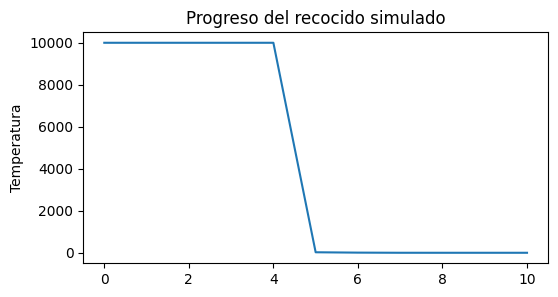

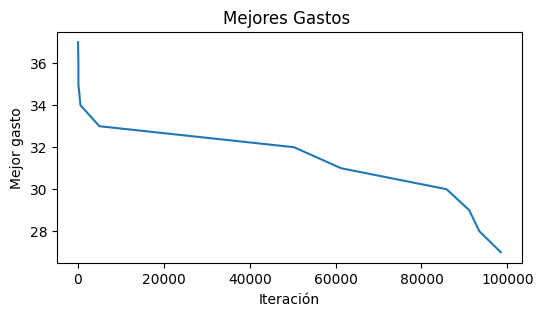

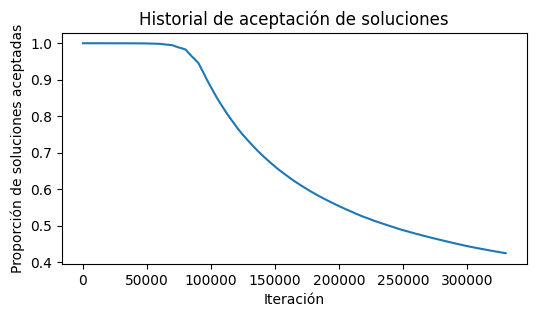

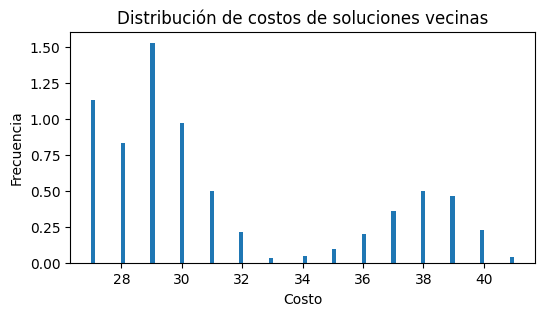

El día 1 se graban las tomas: 19, 18, 24, 17, 14, 23
Haciendo que vayan al estudio los actores: 1, 3, 6

El día 2 se graban las tomas: 12, 1, 20, 13, 7, 2
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6

El día 3 se graban las tomas: 4, 5, 3, 15, 6, 27
Haciendo que vayan al estudio los actores: 1, 2, 4, 5, 7, 8

El día 4 se graban las tomas: 16, 25, 22, 30, 9, 28
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 10

El día 5 se graban las tomas: 11, 10, 26, 21, 8, 29
Haciendo que vayan al estudio los actores: 1, 2, 3, 5, 6, 8, 9

El costo total de los actores que van al estudio en todas las sesiones es: 27


In [20]:
# Parámetros iniciales del algoritmo
temperatura_inicial = 10000.0
temperatura_final = 0.0000000000001
factor_enfriamiento = 0.3
iteraciones_por_temperatura = 10000

# Utiliza el algoritmo de recocido simulado para asignar las tomas a los días de grabación
dias_grabacion = recocido_simulado(temperatura_inicial, temperatura_final, factor_enfriamiento, iteraciones_por_temperatura,tabla_actores)

# Calcula el gasto total utilizando la función objetivo
gasto_total = calcular_gasto_total(dias_grabacion,tabla_actores)

# Imprime el resultado de la asignación
for i, dia in enumerate(dias_grabacion):
    # Obtener el conjunto de actores presentes en el día actual
    actores_presentes = obtener_actores_presentes(dia,tabla_actores)
    # Verifica si el día tiene tomas y actores presentes
    if dia and actores_presentes:
        # Imprimir el número de día y las tomas asignadas en el formato deseado
        print(f"El día {i + 1} se graban las tomas: {', '.join(map(str, [toma + 1 for toma in dia]))}")
        # Imprime los actores presentes en el día en el formato deseado
        print(f"Haciendo que vayan al estudio los actores: {', '.join(map(str, actores_presentes))}")
        # Imprime una línea en blanco para separar los días
        print()

# Imprime el costo total de los actores que van al estudio en todas las sesiones
print(f"El costo total de los actores que van al estudio en todas las sesiones es: {gasto_total}")

##### (*)Calcula la complejidad del algoritmo



Respuesta:

Análisis de la compolejidad del algoritmo

- asignar_tomas_aleatorias(): Esta función tiene una complejidad de $O(n)$, ya que recorre una lista de las tomas. El método shuffle también es $O(n)$ en su complejidad de tiempo ya que tiene que recorrer todos los elementos para mezclarlos. Luego, las tomas se asignan a los días en grupos, que también se recorren en un bucle, sumando al factor $O(n)$. Se puede decir que esta función tiene una complejidad de $O(n)$.

- generar_vecino(asignacion): Esta función tiene una complejidad de $O(1)$ ya que sólo selecciona elementos aleatorios y realiza un intercambio. No importa cuán grande sea la entrada, el tiempo de ejecución será constante.

- probabilidad_aceptacion(gasto_actual, nuevo_gasto, temperatura): La complejidad de esta función es $O(1)$, ya que solo realiza una operación matemática que no depende del tamaño de la entrada.

- obtener_actores_presentes(dia): Esta función itera a través de cada toma en el día y luego a través de cada actor en la tabla de actores. Dado que hay $t$ tomas y $a$ actores, y ambas iteraciones están anidadas, la complejidad total es $O(t*a)$.

- calcular_gasto_total(asignacion,tabla_actores): Esta función itera a través de cada día en la asignación y para cada día llama a obtener_actores_presentes(dia), que es $O(t*a)$. Por lo tanto, si llamamos d al número de días, la complejidad total sería $O(a*t*d)$. Hay que tener en cuenta que el número de días nunca superará el número de tomas por lo que podríamos quitarlo del resultado quedando como $O(t*a)$

- recocido_simulado(temperatura_inicial, temperatura_final, factor_enfriamiento, iteraciones_por_temperatura,tabla_actores):

El número de veces que se ejecuta el bucle principal es proporcional al logaritmo en base factorenfriamiento de la temperatura inicial / temperatura final. Esto es debido a que la temperatura se reduce multiplicándola por el factor de enfriamiento en cada iteración. Siendo IT las iteraciones por temperatura y CO la complejidad del resto de operaciones.

$$\begin{aligned}
O(\log(FactorEnfriamiento) \times \frac{TemperaturaInicial}{TemperaturaFinal} \times IT \times CO)
\end{aligned}$$

El logaritmo está relacionado con la cantidad de enfriamientos que se realizarán en el algoritmo. Este término no crece con el tamaño del problema, pero sí puede ser ajustado para controlar cuántas iteraciones se realizan.
En este caso el número de iteraciones que se realicen en el bucle principal incrementará el costo del algoritmo debido a las constantes multiplicativas

El término $CO$ corresponde a la complejidad de las operaciones realizadas en cada iteración del bucle interno, calcular_gasto_total, y probabilidad_aceptacion.
.



##### Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta:

In [21]:
tabla_act_aleatoria_np

array([[0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1,

##### Aplica el algoritmo al juego de datos generado

Respuesta:

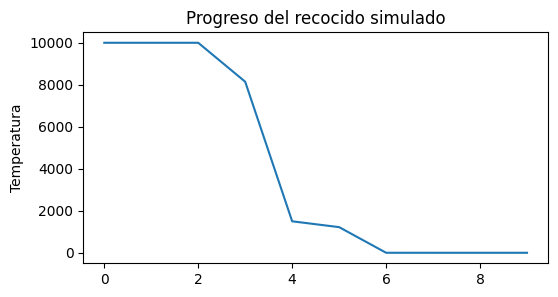

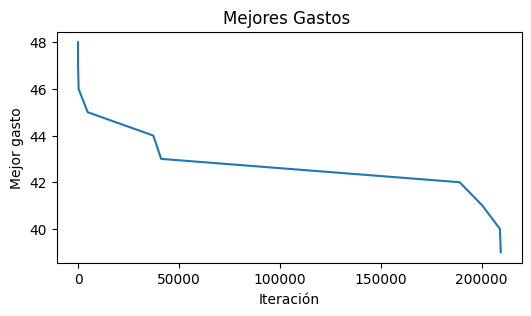

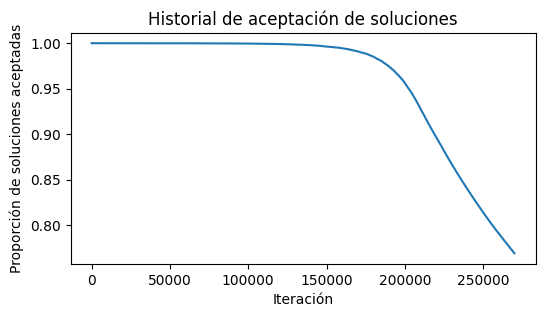

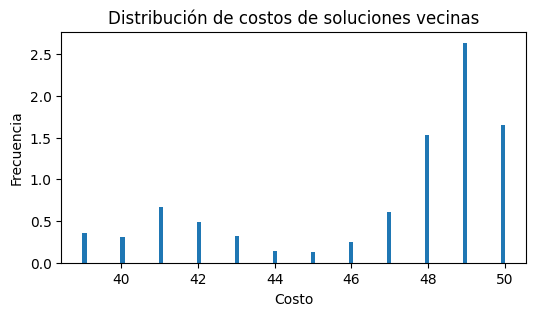

El día 1 se graban las tomas: 24, 29, 7, 21, 3, 18
Haciendo que vayan al estudio los actores: 1, 3, 4, 5, 7, 9, 10

El día 2 se graban las tomas: 20, 9, 13, 1, 15, 10
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6, 7, 8, 9

El día 3 se graban las tomas: 2, 19, 23, 16, 6, 14
Haciendo que vayan al estudio los actores: 1, 2, 3, 4, 5, 6, 7, 8, 10

El día 4 se graban las tomas: 26, 4, 12, 30, 11, 25
Haciendo que vayan al estudio los actores: 1, 3, 4, 6, 7, 9

El día 5 se graban las tomas: 17, 5, 28, 8, 22, 27
Haciendo que vayan al estudio los actores: 2, 4, 5, 6, 7, 8, 9, 10

El costo total de los actores que van al estudio en todas las sesiones es: 39


In [22]:
# Parámetros iniciales del algoritmo
temperatura_inicial = 10000.0
temperatura_final = 0.01
factor_enfriamiento = 0.95
iteraciones_por_temperatura = 1000

# Utilizar el algoritmo de recocido simulado para asignar las tomas a los días de grabación
dias_grabacion = recocido_simulado(temperatura_inicial, temperatura_final, factor_enfriamiento, iteraciones_por_temperatura,tabla_act_aleatoria_np)

# Calcular el gasto total utilizando la función objetivo
gasto_total = calcular_gasto_total(dias_grabacion,tabla_act_aleatoria_np)

# Imprimir el resultado de la asignación
for i, dia in enumerate(dias_grabacion):
    # Obtener el conjunto de actores presentes en el día actual
    actores_presentes = obtener_actores_presentes(dia,tabla_act_aleatoria_np)
    # Verificar si el día tiene tomas y actores presentes
    if dia and actores_presentes:
        # Imprimir el número de día y las tomas asignadas en el formato deseado
        print(f"El día {i + 1} se graban las tomas: {', '.join(map(str, [toma + 1 for toma in dia]))}")
        # Imprimir los actores presentes en el día en el formato deseado
        print(f"Haciendo que vayan al estudio los actores: {', '.join(map(str, actores_presentes))}")
        # Imprimir una línea en blanco para separar los días
        print()

# Imprimir el costo total de los actores que van al estudio en todas las sesiones
print(f"El costo total de los actores que van al estudio en todas las sesiones es: {gasto_total}")

### Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

VELÁSQUEZ, R. (01 Marzo 2016). UN ALGORITMO METAHEURÍSTICO DE RECOCIDO SIMULADO PARA EL 3AP-AXIAL. https://www.redalyc.org/. https://www.redalyc.org/journal/4277/427750771013/html/

Introduction to Greedy Algorithm – Data Structures and Algorithm Tutorials (08 May, 2023)https://www.geeksforgeeks.org/greedy-algorithms/
https://www.geeksforgeeks.org/introduction-to-greedy-algorithm-data-structures-and-algorithm-tutorials/





### Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Para el método Greedy:

- Los algoritmos Greedy pueden ser muy sensibles a la forma en que se presentan los datos. Por ello puede ser una buena opción mezclar los datos de las sesiones y ejecutar el algoritmo varias veces con diferentes órdenes de los datos y ver qué solución es la mejor.

- Para mejorar el algoritmo Greedy podría combinarlo con otras técnicas de optimización. Por ejemplo, podría usar un algoritmo Greedy para generar una solución inicial rápida, y luego mejorarla con un algoritmo de metaheurística, como el recocido simulado.



Para el Recocido simulado:

- La calidad de la solución que proporciona el recocido simulado puede ser muy sensible a los parámetros del algoritmo, como la temperatura inicial, la tasa de enfriamiento, y el número de iteraciones. Se podría intentar hacer una búsqueda sistemática de los parámetros que dan mejores resultados para este problema en particular. O utilizar técnicas de aprendizaje automático para optimizar estos parámetros.

- Se podría tratar de diseñar un operador de vecindad que sea más eficiente o que tenga más probabilidades de encontrar buenas soluciones.

- Intentar combinar el recocido simulado con otros algoritmos de optimización. Por ejemplo, usar un algoritmo de optimización local que proporcione mejores resultados para mejorar las soluciones encontradas por el recocido simulado.




## Problema 3 (Extra)

**Aunque no está completo, he realizado un progreso considerable en el problema 3. Aquí lo que he hecho para que pueda revisarlo si lo considera necesario.**


Combinar cifras y operaciones
- El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las
operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una
cantidad dada. Un ejemplo sería para obtener el 4:
4+2-6/3*1 = 4

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las
siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?


### (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>
Cantidad de soluciones posibles sin restricciones
Si la restricción de que no se repitan no está se podría alcanzar una cantidad de soluciones de 9^5 * 4^4 = 15116544

Por lo tanto tiene orden
- O(n^5 * m^4)

In [23]:
cifras = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ops = ['+', '-', '*', '/']
count = 0
for d1 in cifras:
    for d2 in cifras:
        for d3 in cifras:
            for d4 in cifras:
                for d5 in cifras:
                    for op1 in ops:
                        for op2 in ops:
                            for op3 in ops:
                                for op4 in ops:
                                    count += 1
print(count)

15116544


### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

Cantidad de soluciones posibles con restricciones

Con las restricciones de no repetición las soluciones se pueden calcular como:
$$  n * (n-1) * (n-2) * (n-3) * (n-4) * m * (m-1) * (m-2)* (m-3)$$
$$
9*8*7*6*5*4*3*2*1 = 9! = 362880
$$
Por lo tanto existen 9! posibles soluciones:


In [24]:
count=0
for d1 in cifras:
    for d2 in cifras:
        if d2 == d1:
            continue
        for d3 in cifras:
            if d3 == d1 or d3 == d2:
                continue
            for d4 in cifras:
                if d4 == d1 or d4 == d2 or d4 == d3:
                    continue
                for d5 in cifras:
                    if d5 == d1 or d5 == d2 or d5 == d3 or d5 == d4:
                        continue
                    for op1 in ops:
                        for op2 in ops:
                            if op1 == op2:
                                continue
                            for op3 in ops:
                                if op3 == op1 or op3 == op2:
                                    continue
                                for op4 in ops:
                                    if op4 == op1 or op4 == op2 or op4 == op3:
                                        continue
                                    count += 1
print(count)

362880


### Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)

Las listas son una estructura de datos que se utiliza para almacenar una colección de elementos. En este caso, la lista “cifras” contiene los números del 1 al 9 y la lista “ops” contiene las operaciones aritméticas básicas como suma, resta, multiplicación y división.

Se han escogido las listas como estructura de datos ya que a diferencia de los vectores, las listas en Python pueden contener elementos de diferentes tipos y no necesitan ser del mismo tamaño. Además, las listas en Python son dinámicas, lo que significa que pueden crecer o disminuir de tamaño según sea necesario.



In [25]:
display(cifras)
display(ops)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

['+', '-', '*', '/']

### Según el modelo para el espacio de soluciones<br>

(*)¿Cual es la función objetivo?

$$ expr= f'{d1} {op1} {d2} {op2} {d3} {op3} {d4} {op4} {d5}'$$
$$ eval(expr)=result $$

Donde:

- 'd1', 'd2', ..., 'd5' representan las cifras del 1 al 9
- 'op1', 'op2', 'op3', 'op4' representan los signos de operación correspondientes (+, -, *, /)

(*)¿Es un problema de maximización o minimización?

No es ni de minimización ni de maximización

### Diseña un algoritmo para resolver el problema por fuerza bruta
Resolución del problema por Fuerza Bruta SIN RESTRICCIONES

Se ha definido una función que genera todas las posibles combinaciones de cifras y operaciones, incluso repitiendo cifras y operaciones.

Es decir, se pueden generar expresiones como '1 + 1 + 1 + 1 + 1' o '1 * 2 * 3 * 4 * 5'.

Al final se añade una comprobación adicional después de calcular el resultado:
- Si las cifras y las operaciones en la expresión son todas únicas, se imprime la expresión y el resultado.
- Si no son únicas, la expresión se descarta.

In [29]:
def encontrar_expresion(objetivo,cifras,ops):
    for d1 in cifras:
        for d2 in cifras:
            for d3 in cifras:
                for d4 in cifras:
                    for d5 in cifras:
                        for op1 in ops:
                            for op2 in ops:
                                for op3 in ops:
                                    for op4 in ops:
                                        expr = f'{d1} {op1} {d2} {op2} {d3} {op3} {d4} {op4} {d5}'
                                        try:
                                            result = round(eval(expr),3)
                                            if result == objetivo:
                                                cifras_list = [d1, d2, d3, d4, d5]
                                                op_list = [op1, op2, op3, op4]
                                                if len(set(cifras_list)) == len(cifras_list) and len(set(op_list)) == len(op_list):
                                                    print(f'{expr} = {result}')
                                        except ZeroDivisionError:
                                            pass
    return None

try:
    encontrar_expresion(4,cifras,ops)
except KeyboardInterrupt:
    print("Búsqueda interrumpida.")

1 - 2 * 3 / 6 + 4 = 4.0
1 - 2 / 3 * 6 + 7 = 4.0
1 / 2 * 4 - 3 + 5 = 4.0
1 / 2 * 4 + 5 - 3 = 4.0
1 / 2 * 4 - 5 + 7 = 4.0
1 * 2 + 4 - 6 / 3 = 4.0
1 / 2 * 4 - 6 + 8 = 4.0
1 / 2 * 4 + 7 - 5 = 4.0
1 / 2 * 4 - 7 + 9 = 4.0
1 / 2 * 4 + 8 - 6 = 4.0
1 - 2 / 4 * 8 + 7 = 4.0
1 / 2 * 4 + 9 - 7 = 4.0
1 * 2 + 5 - 9 / 3 = 4.0
1 - 2 / 6 * 3 + 4 = 4.0
1 * 2 - 6 / 3 + 4 = 4.0
1 / 2 * 6 - 3 + 4 = 4.0
1 - 2 * 6 / 3 + 7 = 4.0
1 / 2 * 6 + 4 - 3 = 4.0
1 / 2 * 6 - 4 + 5 = 4.0
1 / 2 * 6 + 5 - 4 = 4.0
1 / 2 * 6 - 7 + 8 = 4.0
1 / 2 * 6 + 8 - 7 = 4.0
1 / 2 * 6 - 8 + 9 = 4.0
1 / 2 * 6 + 9 - 8 = 4.0
1 - 2 * 8 / 4 + 7 = 4.0
1 * 2 - 9 / 3 + 5 = 4.0
Búsqueda interrumpida.


### Calcula la complejidad del algoritmo por fuerza bruta

Cantidad de soluciones posibles SIN RESTRICCIONES

Si la restricción de que no se repitan no está se podría alcanzar una cantidad de soluciones de 9^5 * 4^4 = 15116544

Por lo tanto tiene orden
- O(n^5 * m^4)

### Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta


El siguiente método evita probar las combinaciones en la que no se cumplan las condiciones de no repetición. Es decir, evita que la misma cifra o la misma operación se use más de una vez en la misma expresión.

Esto se logra mediante las declaraciones continue, que saltan al siguiente ciclo si la cifra o la operación ya ha sido utilizada.

En términos de eficiencia computacional, será generalmente más rápido que el primero porque tiene que probar menos combinaciones.

In [31]:
def encontrar_expresion(objetivo,cifras,ops):
    for d1 in cifras:
        for d2 in cifras:
            if d2 == d1:
                continue
            for d3 in cifras:
                if d3 == d1 or d3 == d2:
                    continue
                for d4 in cifras:
                    if d4 == d1 or d4 == d2 or d4 == d3:
                        continue
                    for d5 in cifras:
                        if d5 == d1 or d5 == d2 or d5 == d3 or d5 == d4:
                            continue
                        for op1 in ops:
                            for op2 in ops:
                                if op1 == op2:
                                    continue
                                for op3 in ops:
                                    if op3 == op1 or op3 == op2:
                                        continue
                                    for op4 in ops:
                                        if op4 == op1 or op4 == op2 or op4 == op3:
                                            continue
                                        expr = f'{d1} {op1} {d2} {op2} {d3} {op3} {d4} {op4} {d5}'
                                        try:
                                            result = round(eval(expr),3)
                                            if result == objetivo:
                                                print(f'{expr} = {result}')
                                            #    return expr
                                        except ZeroDivisionError:
                                            pass
    return None
try:
    encontrar_expresion(4,cifras,ops)
except KeyboardInterrupt:
    print("Búsqueda interrumpida.")

1 - 2 * 3 / 6 + 4 = 4.0
1 - 2 / 3 * 6 + 7 = 4.0
1 / 2 * 4 - 3 + 5 = 4.0
1 / 2 * 4 + 5 - 3 = 4.0
1 / 2 * 4 - 5 + 7 = 4.0
1 * 2 + 4 - 6 / 3 = 4.0
1 / 2 * 4 - 6 + 8 = 4.0
1 / 2 * 4 + 7 - 5 = 4.0
1 / 2 * 4 - 7 + 9 = 4.0
1 / 2 * 4 + 8 - 6 = 4.0
1 - 2 / 4 * 8 + 7 = 4.0
1 / 2 * 4 + 9 - 7 = 4.0
1 * 2 + 5 - 9 / 3 = 4.0
1 - 2 / 6 * 3 + 4 = 4.0
1 * 2 - 6 / 3 + 4 = 4.0
1 / 2 * 6 - 3 + 4 = 4.0
1 - 2 * 6 / 3 + 7 = 4.0
1 / 2 * 6 + 4 - 3 = 4.0
1 / 2 * 6 - 4 + 5 = 4.0
1 / 2 * 6 + 5 - 4 = 4.0
1 / 2 * 6 - 7 + 8 = 4.0
1 / 2 * 6 + 8 - 7 = 4.0
1 / 2 * 6 - 8 + 9 = 4.0
1 / 2 * 6 + 9 - 8 = 4.0
1 - 2 * 8 / 4 + 7 = 4.0
1 * 2 - 9 / 3 + 5 = 4.0
1 - 3 / 2 * 4 + 9 = 4.0
1 - 3 * 2 / 6 + 4 = 4.0
1 + 3 / 2 * 8 - 9 = 4.0
1 - 3 * 4 / 2 + 9 = 4.0
1 * 3 + 4 - 6 / 2 = 4.0
1 - 3 * 4 / 6 + 5 = 4.0
1 - 3 + 4 / 6 * 9 = 4.0
1 - 3 / 4 * 8 + 9 = 4.0
1 - 3 + 4 * 9 / 6 = 4.0
1 * 3 + 5 - 8 / 2 = 4.0
1 - 3 / 6 * 2 + 4 = 4.0
1 * 3 - 6 / 2 + 4 = 4.0
1 / 3 * 6 - 2 + 4 = 4.0
1 / 3 * 6 + 4 - 2 = 4.0
1 - 3 / 6 * 4 + 5 = 4.0
1 / 3 * 6 - 5 + 

### Calcula la complejidad del algoritmo por fuerza bruta SIN RESTRICCIONES



Con las restricciones de no repetición las soluciones se pueden calcular como  n * (n-1) * (n-2) * (n-3) * (n-4) * m * (m-1) * (m-2)* (m-3)
9*8*7*6*5*4*3*2*1 = 9! = 362880


Por lo tanto tiene orden:
- O(n!) o O(m!) según cuál crezca más


### Máximo y mínimo valor posibles sin restricciones

In [32]:
cifras = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ops = ['+', '-', '*', '/']
count = 0
min_result=0
max_result=0

for d1 in cifras:
    for d2 in cifras:
        for d3 in cifras:
            for d4 in cifras:
                for d5 in cifras:
                    for op1 in ops:
                        for op2 in ops:
                            for op3 in ops:
                                for op4 in ops:
                                    expr = f'{d1} {op1} {d2} {op2} {d3} {op3} {d4} {op4} {d5}'
                                    result = round(eval(expr),3)
                                    if result <= min_result:
                                        expr_min = expr
                                        min_result=result
                                    if result >= max_result:
                                        expr_max = expr
                                        max_result=result
print(f'{expr_min} = {min_result}')
print(f'{expr_max} = {max_result}')

1 - 9 * 9 * 9 * 9 = -6560
9 * 9 * 9 * 9 * 9 = 59049


### Máximo y mínimo valor posible con restricciones

In [33]:
cifras = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ops = ['+', '-', '*', '/']
count = 0
min_result=0
max_result=0

for d1 in cifras:
    for d2 in cifras:
        if d2 == d1:
            continue
        for d3 in cifras:
            if d3 == d1 or d3 == d2:
                continue
            for d4 in cifras:
                if d4 == d1 or d4 == d2 or d4 == d3:
                    continue
                for d5 in cifras:
                    if d5 == d1 or d5 == d2 or d5 == d3 or d5 == d4:
                        continue
                    for op1 in ops:
                        for op2 in ops:
                            if op1 == op2:
                                continue
                            for op3 in ops:
                                if op3 == op1 or op3 == op2:
                                    continue
                                for op4 in ops:
                                    if op4 == op1 or op4 == op2 or op4 == op3:
                                        continue
                                    expr = f'{d1} {op1} {d2} {op2} {d3} {op3} {d4} {op4} {d5}'
                                    result = round(eval(expr),3)
                                    if result <= min_result:
                                        expr_min = expr
                                        min_result=result
                                    if result >= max_result:
                                        expr_max = expr
                                        max_result=result
print(f'{expr_min} = {min_result}')
print(f'{expr_max} = {max_result}')



2 / 7 - 9 * 8 + 1 = -70.714
9 * 8 + 7 - 1 / 6 = 78.833


Para entender por qué esos son el mínimo y el máximo, se puede analizar el problema matemáticamente.
En general, el valor mínimo se obtiene cuando se utilizan los números más pequeños para restar o dividir entre sí y luego se suman o multiplican con los números más grandes.
Por otro lado, el valor máximo se obtiene cuando se utilizan los números más grandes para sumar o multiplicar entre sí y luego se restan o dividen con los números más pequeños
